<a href="https://colab.research.google.com/github/Maddyhub007/portfolio-website/blob/main/NM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization styles
sns.set_theme(style="whitegrid", palette="pastel")

# Display settings for better clarity
pd.set_option('display.max_columns', None)


In [ ]:


# Load the dataset into a DataFrame
df = pd.read_csv('portfolio_web_activity.csv')

# Quick overview of the dataset
print("Dataset Overview:")
display(df.head())

# Convert the 'Date' column to a datetime format
df['Date'] = pd.to_datetime(df['Date'])


Dataset Overview:


,Date,Country,Home Views,About Views,Skills Views,Projects Views,Contact Views,Total Views
0,2024-01-12,France,159,36,227,248,63,733
1,2024-01-25,Australia,70,113,75,76,51,385
2,2024-01-05,India,469,115,293,115,34,1026
3,2024-01-17,UK,99,12,117,282,98,608
4,2024-01-06,Australia,133,102,118,120,81,554


In [ ]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
display(df.describe())


Missing Values:
Date              0
Country           0
Home Views        0
About Views       0
Skills Views      0
Projects Views    0
Contact Views     0
Total Views       0
dtype: int64

Summary Statistics:


,Date,Home Views,About Views,Skills Views,Projects Views,Contact Views,Total Views
count,200,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2024-01-16 14:38:24,265.120000,150.220000,162.975000,154.505000,50.335000,783.155000
min,2024-01-01 00:00:00,10.000000,5.000000,6.000000,5.000000,2.000000,366.000000
25%,2024-01-08 00:00:00,128.000000,75.500000,89.750000,79.750000,24.750000,630.750000
50%,2024-01-16 12:00:00,264.000000,151.000000,167.500000,155.000000,48.000000,785.000000
75%,2024-01-25 00:00:00,387.750000,221.250000,234.250000,228.000000,75.000000,946.750000
max,2024-01-31 00:00:00,497.000000,298.000000,300.000000,299.000000,100.000000,1247.000000
std,NaN,145.571014,86.443415,88.091286,84.711393,28.976386,200.486897


<ipython-input-5-7cc69ab68a8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_views, x='Total Views', y='Country', palette='viridis')


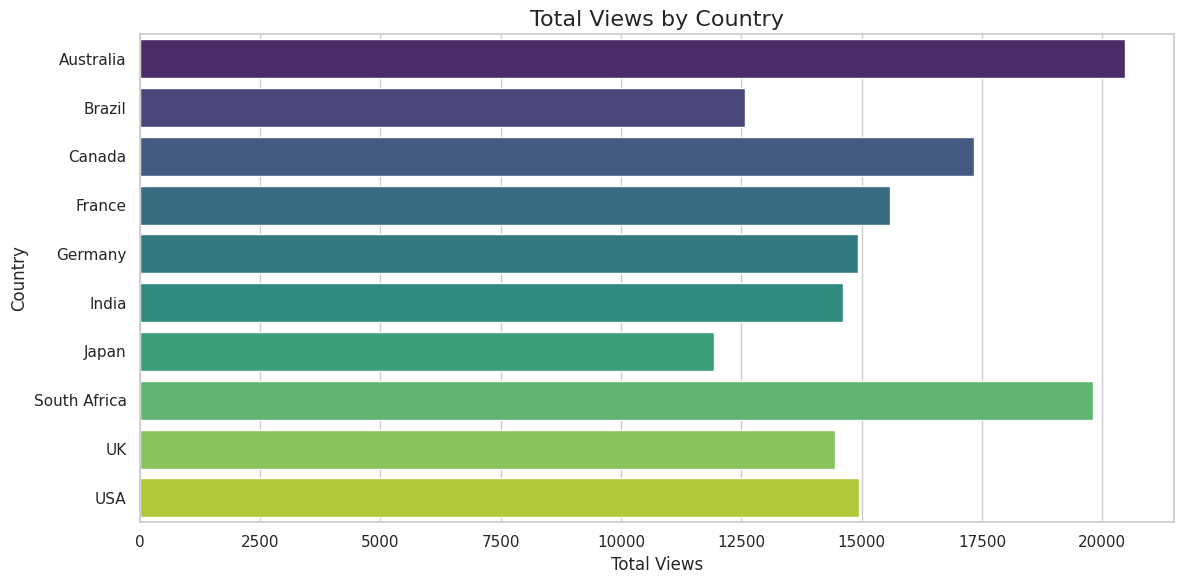

In [ ]:
# Total views by country
country_views = df.groupby('Country')['Total Views'].sum().reset_index()

# Visualization: Total Views by Country
plt.figure(figsize=(12, 6))
sns.barplot(data=country_views, x='Total Views', y='Country', palette='viridis')
plt.title("Total Views by Country", fontsize=16)
plt.xlabel("Total Views", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.tight_layout()
plt.show()


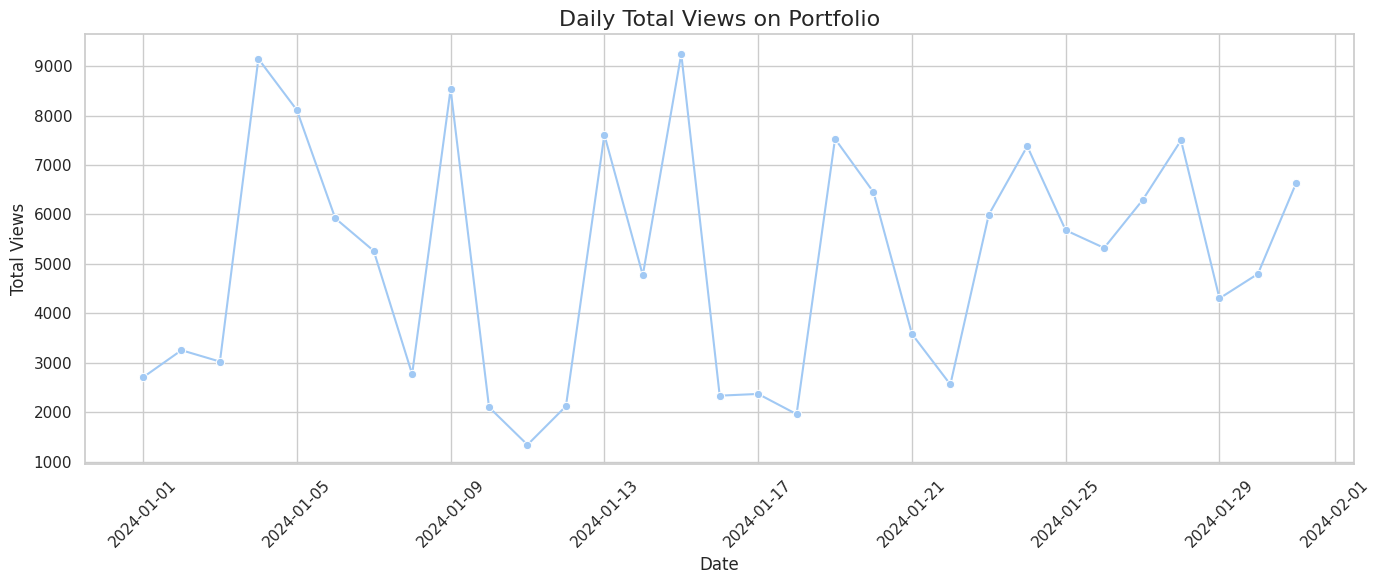

In [ ]:
# Daily total views
daily_views = df.groupby('Date')['Total Views'].sum().reset_index()

# Visualization: Daily Total Views
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_views, x='Date', y='Total Views', marker='o', color='b')
plt.title("Daily Total Views on Portfolio", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Views", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-7-8f4e495a78fc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=page_views, x='Views', y='Page', palette='coolwarm')


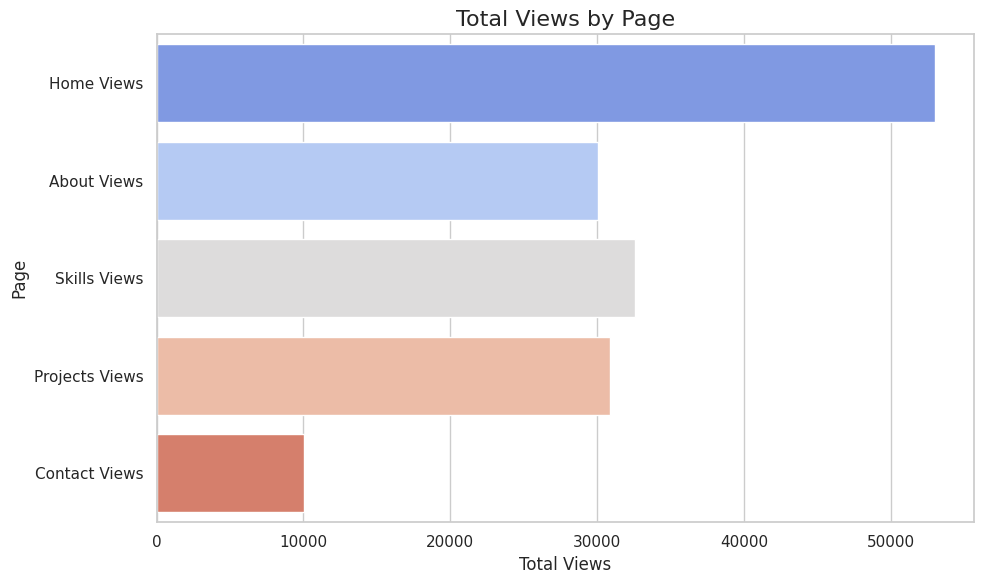

In [ ]:
# Sum of views for each page
page_views = df[['Home Views', 'About Views', 'Skills Views', 'Projects Views', 'Contact Views']].sum().reset_index()
page_views.columns = ['Page', 'Views']

# Visualization: Views by Page
plt.figure(figsize=(10, 6))
sns.barplot(data=page_views, x='Views', y='Page', palette='coolwarm')
plt.title("Total Views by Page", fontsize=16)
plt.xlabel("Total Views", fontsize=12)
plt.ylabel("Page", fontsize=12)
plt.tight_layout()
plt.show()


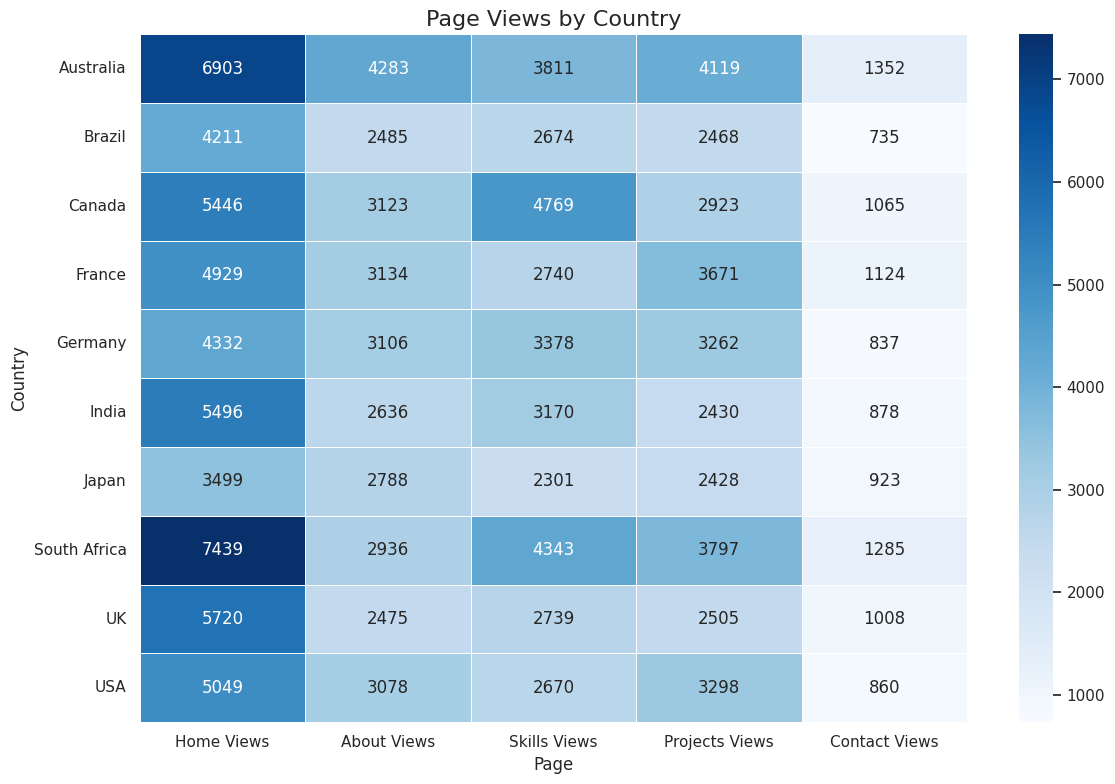

In [ ]:
# Pivot table for country vs specific page views
country_page_views = df.groupby('Country')[['Home Views', 'About Views', 'Skills Views', 'Projects Views', 'Contact Views']].sum()

# Heatmap: Views by Country and Page
plt.figure(figsize=(12, 8))
sns.heatmap(country_page_views, annot=True, fmt=".0f", cmap="Blues", linewidths=0.5)
plt.title("Page Views by Country", fontsize=16)
plt.xlabel("Page", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.tight_layout()
plt.show()


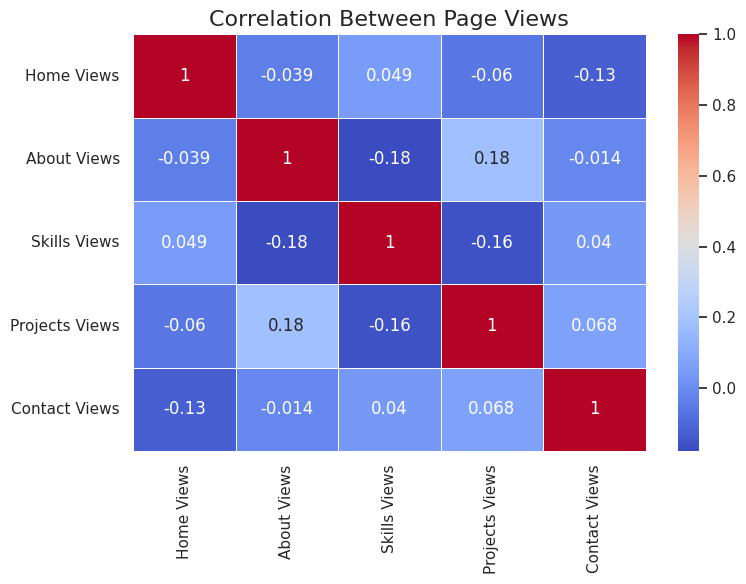

In [ ]:
# Correlation matrix
correlation_matrix = df[['Home Views', 'About Views', 'Skills Views', 'Projects Views', 'Contact Views']].corr()

# Heatmap: Correlation between views
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Page Views", fontsize=16)
plt.tight_layout()
plt.show()


<ipython-input-10-bb3b9511ffa6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='Total Views', y='Country', palette='mako')


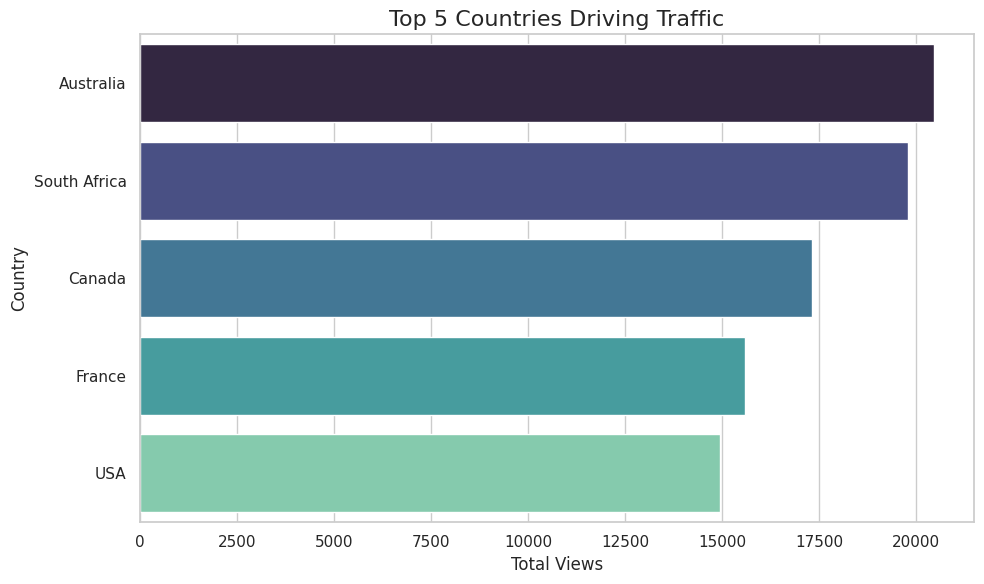

In [ ]:
# Top 5 countries with highest traffic
top_countries = country_views.sort_values('Total Views', ascending=False).head(5)

# Visualization: Top 5 Countries
plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='Total Views', y='Country', palette='mako')
plt.title("Top 5 Countries Driving Traffic", fontsize=16)
plt.xlabel("Total Views", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.tight_layout()
plt.show()
